# Movies IMDB Data Analysis


## Project Overview

This project involves analyzing a dataset of movies from IMDb, a well-known online database of information related to films, television programs, home videos, video games, and streaming content. The goal is to gain insights into various aspects of movies, such as ratings, genres, release dates, and other key attributes. This is project I have done in the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Downloading the Dataset

**About the Dataset**

The IMDB movie Rating Dataset is a dataset conatining IMDB ratings of top 1000 movies and TV shows. The data set used for this is available on: https://www.kaggle.com/datasets/milanvaddoriya/imdb-movie-rating




I have downloaded the Movies IMDB data from Kaggle and analyzed it.


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/milanvaddoriya/imdb-movie-rating'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kusum811
Your Kaggle Key: ········


100%|██████████| 24.0k/24.0k [00:00<00:00, 19.9MB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './imdb-movie-rating'

In [ ]:
import os
os.listdir(data_dir)

['imdb.csv']

## Data Preparation and Cleaning

*  Load the dataset into a data frame using Pandas.
*  Explore basic information about the data such as the number of rows & columns, ranges of values etc.
*  Handled missing data by replacing or removing NaN values.



In [ ]:
raw_df=pd.read_csv('imdb-movie-rating/imdb.csv')
raw_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0
...,...,...,...,...,...,...,...,...,...
995,996,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,NaN,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",85.0,30.50,7.6
997,998,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",96.0,184.93,7.6
998,999,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,NaN,7.6


In [ ]:
raw_df.shape
raw_df.info()
raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   object 
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     993 non-null    object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Metascore       840 non-null    float64
 7   Gross_in_$_M    841 non-null    object 
 8   Rating_from_10  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


,Runtime_in_min,Metascore,Rating_from_10
count,1000.000000,840.000000,1000.000000
mean,123.798000,78.795238,7.968100
std,28.540844,12.021474,0.277145
min,45.000000,28.000000,7.600000
25%,103.000000,71.000000,7.800000
50%,120.000000,80.000000,7.900000
75%,138.000000,88.000000,8.100000
max,321.000000,100.000000,9.300000


In [ ]:
raw_df.Certificate = raw_df.Certificate.fillna('Not Rated')
raw_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0
...,...,...,...,...,...,...,...,...,...
995,996,Sabrina,1954,Passed,113,"Comedy, Drama, Romance",72.0,NaN,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",85.0,30.50,7.6
997,998,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",96.0,184.93,7.6
998,999,The 39 Steps,1935,Approved,86,"Crime, Mystery, Thriller",93.0,NaN,7.6


In [ ]:
raw_copy_df=raw_df.copy()
raw_copy_df.drop(columns=['Metascore'], inplace=True)
raw_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   object 
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     1000 non-null   object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Gross_in_$_M    841 non-null    object 
 7   Rating_from_10  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
imdb_movies_df=raw_copy_df.dropna()
imdb_movies_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
...,...,...,...,...,...,...,...,...
990,991,The Jungle Book,1967,G,78,"Animation, Adventure, Comedy",141.84,7.6
992,993,The Birds,1963,PG-13,119,"Drama, Horror, Mystery",11.40,7.6
993,994,Eyes Without a Face,1960,Not Rated,90,"Drama, Horror",0.05,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",30.50,7.6


In [ ]:
imdb_movies_df=raw_copy_df.dropna()
imdb_movies_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
...,...,...,...,...,...,...,...,...
990,991,The Jungle Book,1967,G,78,"Animation, Adventure, Comedy",141.84,7.6
992,993,The Birds,1963,PG-13,119,"Drama, Horror, Mystery",11.40,7.6
993,994,Eyes Without a Face,1960,Not Rated,90,"Drama, Horror",0.05,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",30.50,7.6


In [ ]:
imdb_movies_df.rename(columns = {'Gross_in_$_M':'Gross_M'},inplace=True)
imdb_movies_df

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
...,...,...,...,...,...,...,...,...
990,991,The Jungle Book,1967,G,78,"Animation, Adventure, Comedy",141.84,7.6
992,993,The Birds,1963,PG-13,119,"Drama, Horror, Mystery",11.40,7.6
993,994,Eyes Without a Face,1960,Not Rated,90,"Drama, Horror",0.05,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",30.50,7.6


In [ ]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 997
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            841 non-null    object 
 1   Movie_name      841 non-null    object 
 2   Year            841 non-null    object 
 3   Certificate     841 non-null    object 
 4   Runtime_in_min  841 non-null    int64  
 5   Genre           841 non-null    object 
 6   Gross_M         841 non-null    object 
 7   Rating_from_10  841 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 59.1+ KB


In [ ]:
imdb_movies_df.describe()

,Runtime_in_min,Rating_from_10
count,841.000000,841.000000
mean,124.139120,7.969917
std,27.672935,0.284456
min,45.000000,7.600000
25%,103.000000,7.700000
50%,121.000000,7.900000
75%,138.000000,8.100000
max,242.000000,9.300000


In [ ]:
imdb_movies_year_df = imdb_movies_df.groupby('Year')['Gross_M'].sum()
imdb_movies_year_df

Year
1921               5.45
1924               0.98
1925           5.450.05
1926               1.03
1927           1.240.54
               ...     
I 2019           335.45
I 2020             #130
II 2016     100.5526.86
III 2016           1.24
III 2018          26.02
Name: Gross_M, Length: 117, dtype: object

In [ ]:
imdb_movies_cert_df = imdb_movies_df.groupby('Certificate')[['Runtime_in_min','Rating_from_10']].mean()
imdb_movies_cert_df

,Runtime_in_min,Rating_from_10
Certificate,,
Approved,131.400000,8.175000
G,117.257143,8.028571
GP,133.333333,8.000000
M/PG,127.000000,8.200000
NC-17,157.000000,7.700000
Not Rated,126.912281,8.016667
PG,114.172131,7.963115
PG-13,129.974843,7.922642
Passed,112.281250,8.043750


## Exploratory Analysis and Visualization

*  Compute the mean, sum, range and other interesting statistics for numeric columns.
*  Explore the distributions of numeric columns using histograms etc.
*  Analyze the relationship between columns using scatter plots, pie charts etc.


In [ ]:
imdb_movies_df.describe()

,Runtime_in_min,Rating_from_10
count,841.000000,841.000000
mean,124.139120,7.969917
std,27.672935,0.284456
min,45.000000,7.600000
25%,103.000000,7.700000
50%,121.000000,7.900000
75%,138.000000,8.100000
max,242.000000,9.300000


In [ ]:
imdb_movies_df.head(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
5,6,The Godfather Part II,1974,R,202,"Crime, Drama",57.30,9.0
6,7,12 Angry Men,1957,Approved,96,"Crime, Drama",4.36,9.0
8,9,Pulp Fiction,1994,R,154,"Crime, Drama",107.93,8.9
10,11,Jai Bhim,2021,TV-MA,164,"Crime, Drama, Mystery",#233,8.8
11,12,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",292.58,8.8


In [ ]:
imdb_movies_df.tail(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
985,986,The Road Warrior,1981,R,96,"Action, Adventure, Sci-Fi",12.47,7.6
986,987,Close Encounters of the Third Kind,1977,PG,138,"Drama, Sci-Fi",132.09,7.6
987,988,The Taking of Pelham One Two Three,1974,R,104,"Action, Crime, Thriller",2.49,7.6
988,989,Enter the Dragon,1973,R,102,"Action, Crime, Drama",25.00,7.6
989,990,The Odd Couple,1968,Passed,105,Comedy,44.53,7.6
990,991,The Jungle Book,1967,G,78,"Animation, Adventure, Comedy",141.84,7.6
992,993,The Birds,1963,PG-13,119,"Drama, Horror, Mystery",11.40,7.6
993,994,Eyes Without a Face,1960,Not Rated,90,"Drama, Horror",0.05,7.6
996,997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",30.50,7.6
997,998,Snow White and the Seven Dwarfs,1937,Approved,83,"Animation, Adventure, Family",184.93,7.6


In [ ]:
imdb_movies_df.sample(10)

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
160,161,The Wolf of Wall Street,2013,R,180,"Biography, Comedy, Crime",116.90,8.2
66,67,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",190.24,8.4
428,429,Papillon,1973,R,151,"Biography, Crime, Drama",53.27,8.0
943,944,Superbad,2007,R,113,Comedy,121.46,7.6
182,183,Indiana Jones and the Last Crusade,1989,PG-13,127,"Action, Adventure",197.17,8.2
732,733,Mary Poppins,1964,G,139,"Comedy, Family, Fantasy",102.27,7.8
774,775,The Broken Circle Breakdown,2012,Not Rated,111,"Drama, Music, Romance",0.18,7.7
535,536,Knockin' on Heaven's Door,1997,Not Rated,87,"Action, Crime, Comedy",0.00,7.9
763,764,The Breadwinner,2017,PG-13,94,"Animation, Drama, Family",0.31,7.7
826,827,In America,2002,PG-13,105,Drama,15.54,7.7


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploring features by plotting graphs.

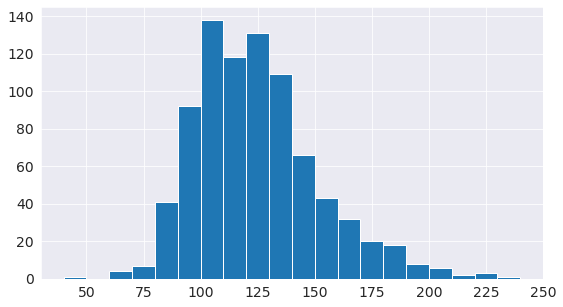

In [ ]:
plt.hist(imdb_movies_df.Runtime_in_min, bins=np.arange(40,250, 10));

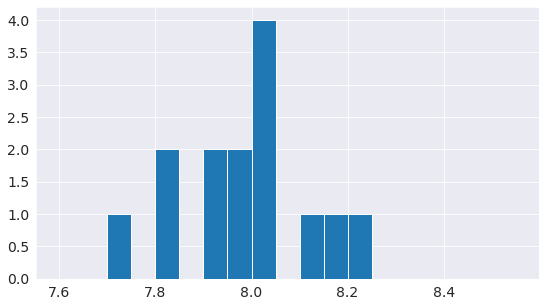

In [ ]:
plt.hist(imdb_movies_cert_df.Rating_from_10, bins=np.arange(7.6, 8.6, 0.05));

In the following plots, we plot distribution of movies according to ratings out of 10. We observe that no movies have rating less than 7, so, to see the histogram clearly we update the range of histogram and plot in range 7 to 10.

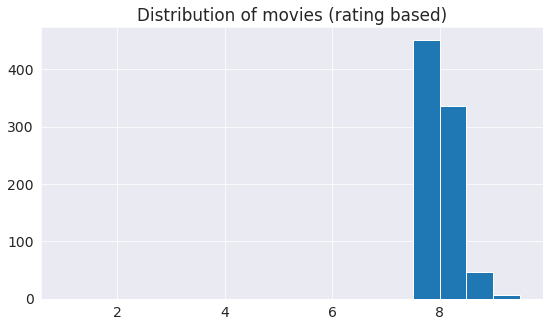

In [ ]:
plt.title("Distribution of movies (rating based)")
plt.hist(imdb_movies_df.Rating_from_10,bins=np.arange(1, 10, 0.5));

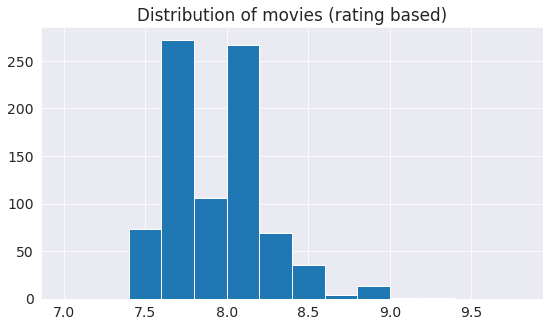

In [ ]:
plt.title("Distribution of movies (rating based)")
plt.hist(imdb_movies_df.Rating_from_10,bins=np.arange(7, 10, 0.2));

In the following plots, we plot duration distribution of movies and rating distribution of movies.

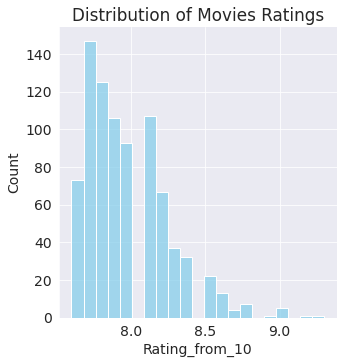

In [ ]:
sns.displot(imdb_movies_df.Rating_from_10, color='skyblue').set(title='Distribution of Movies Ratings')

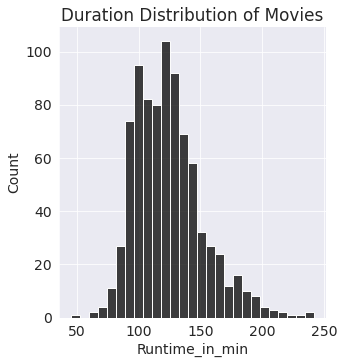

In [ ]:
sns.displot(imdb_movies_df.Runtime_in_min, color='black').set(title='Duration Distribution of Movies')

Considering following two plots corresponding to data for imdb_movies_cert_df and scatter plot is better at depicting the relation.

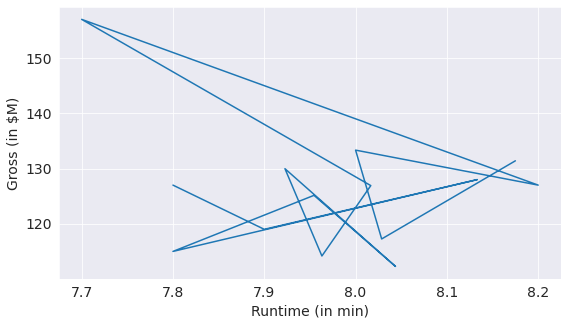

In [ ]:
plt.plot(imdb_movies_cert_df.Rating_from_10,imdb_movies_cert_df.Runtime_in_min)
plt.xlabel('Runtime (in min)')
plt.ylabel('Gross (in $M)');

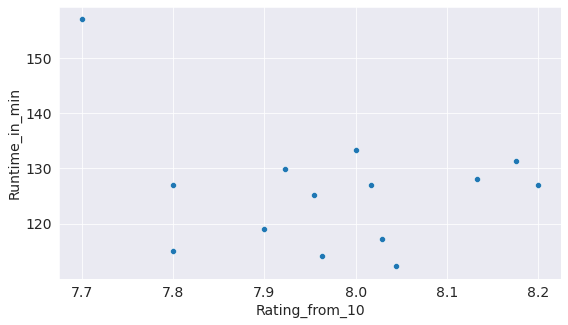

In [ ]:
sns.scatterplot(x=imdb_movies_cert_df.Rating_from_10, y=imdb_movies_cert_df.Runtime_in_min);

Now, we plot simple plot and scatter plot for the data including Rating and Runtime. and we observe that the scatter plot is easy to analyse.

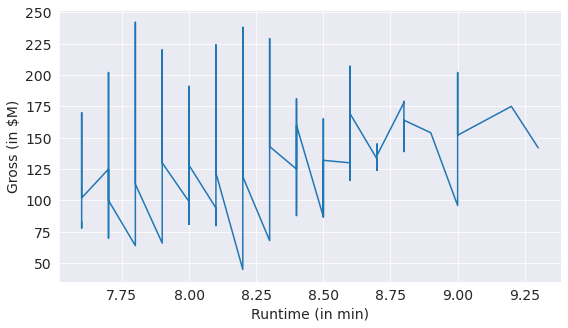

In [ ]:
plt.plot(imdb_movies_df.Rating_from_10,imdb_movies_df.Runtime_in_min)
plt.xlabel('Runtime (in min)')
plt.ylabel('Gross (in $M)');

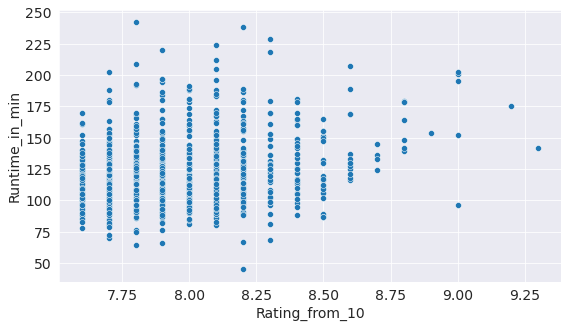

In [ ]:
sns.scatterplot(x=imdb_movies_df.Rating_from_10, y=imdb_movies_df.Runtime_in_min);

## 5 Interesting Questions and their answers

On the basis of our data, we ask some questions and answer them.



#### Q1: List the movies have Rating_from_10 more than 9. Also, list the movies have Rating_from_10 more than 8.5.

In [ ]:
high_imdb_movies_df = imdb_movies_df[imdb_movies_df.Rating_from_10 > 9]

In [ ]:
high_imdb_movies_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2


In [ ]:
Okay_imdb_movies_df = imdb_movies_df[imdb_movies_df.Rating_from_10 > 8.5]
Okay_imdb_movies_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
5,6,The Godfather Part II,1974,R,202,"Crime, Drama",57.30,9.0
6,7,12 Angry Men,1957,Approved,96,"Crime, Drama",4.36,9.0
8,9,Pulp Fiction,1994,R,154,"Crime, Drama",107.93,8.9
10,11,Jai Bhim,2021,TV-MA,164,"Crime, Drama, Mystery",#233,8.8
11,12,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",292.58,8.8


#### Q2: What are top 20 movies according to Rating_from_10 in increasing order?

In [ ]:
imdb_sorted20_df=imdb_movies_df.sort_values('Rating_from_10', ascending=False).head(20)
imdb_sorted20_df

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Gross_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",96.90,9.0
5,6,The Godfather Part II,1974,R,202,"Crime, Drama",57.30,9.0
6,7,12 Angry Men,1957,Approved,96,"Crime, Drama",4.36,9.0
8,9,Pulp Fiction,1994,R,154,"Crime, Drama",107.93,8.9
13,14,Fight Club,1999,R,139,Drama,37.03,8.8
16,17,"The Good, the Bad and the Ugly",1966,Approved,178,"Adventure, Western",6.10,8.8


#### Q3: What is the mean Runtime_in_min for the refined dataset? and what is the  average runtime_in_min for the top 20 movies according to rating_from_10 in the refined dataset?

In [ ]:
imdb_movies_df.Runtime_in_min.mean()

124.13912009512485

In [ ]:
imdb_sorted20_df.Runtime_in_min.mean()

156.0

#### Q4: Draw a pie chart and scatter plot on the basis of Certificate.

In [ ]:
Cert_df= imdb_movies_df['Certificate'].value_counts()
Cert_df

R            347
PG-13        159
PG           122
Not Rated    114
G             35
Passed        32
Approved      20
TV-MA          3
GP             3
NC-17          2
M/PG           1
TV-PG          1
TV-14          1
Unrated        1
Name: Certificate, dtype: int64

In [ ]:
Cert1_df=pd.DataFrame(Cert_df)
Cert1_df

,Certificate
R,347
PG-13,159
PG,122
Not Rated,114
G,35
Passed,32
Approved,20
TV-MA,3
GP,3
NC-17,2


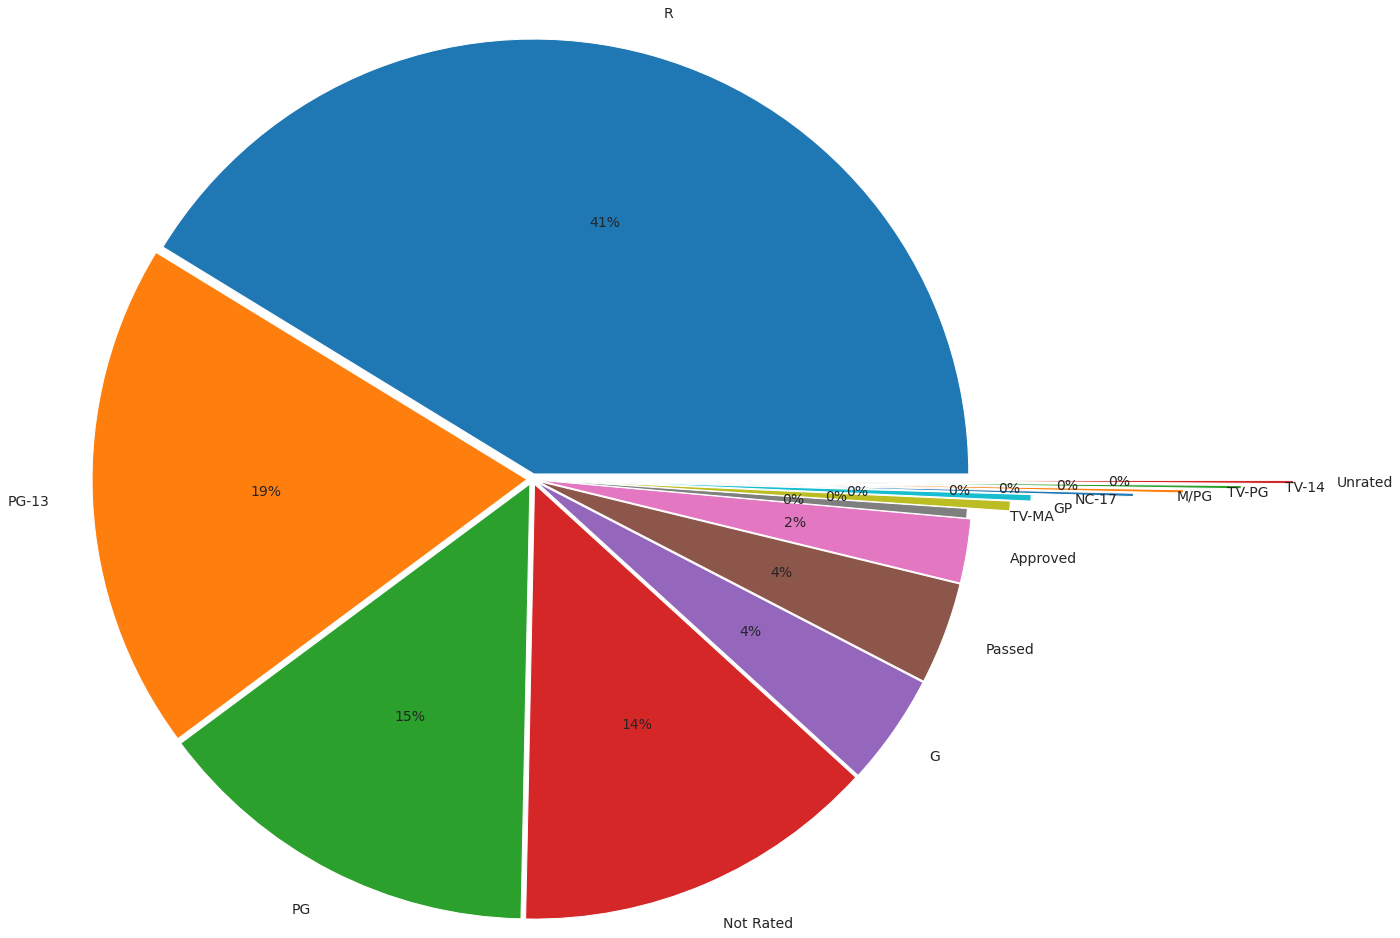

In [ ]:
g = plt.pie(imdb_movies_df.Certificate.value_counts(), labels=imdb_movies_df.Certificate.value_counts().index, autopct="%.0f%%", radius = 4,
            explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.01, 0.4, 0.59, 1.53, 1.99, 2.52,3.0));
plt.show()

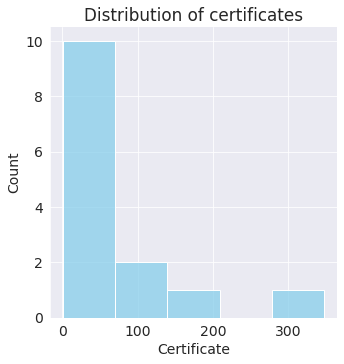

In [ ]:
sns.displot(Cert1_df.Certificate, color='skyblue').set(title='Distribution of certificates')

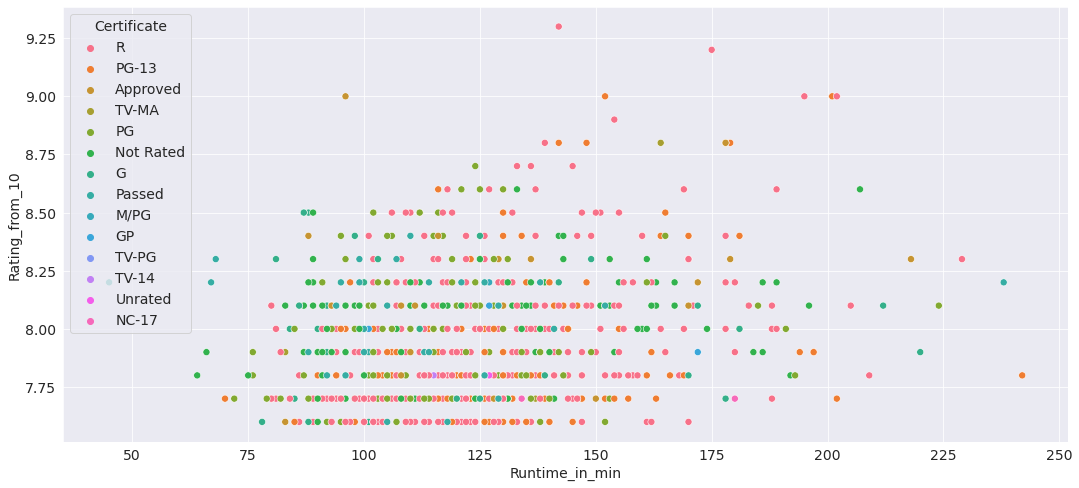

In [ ]:
plt.figure(figsize = (18,8))
sns.scatterplot(x=imdb_movies_df.Runtime_in_min, y=imdb_movies_df.Rating_from_10, hue=imdb_movies_df.Certificate, s=50);


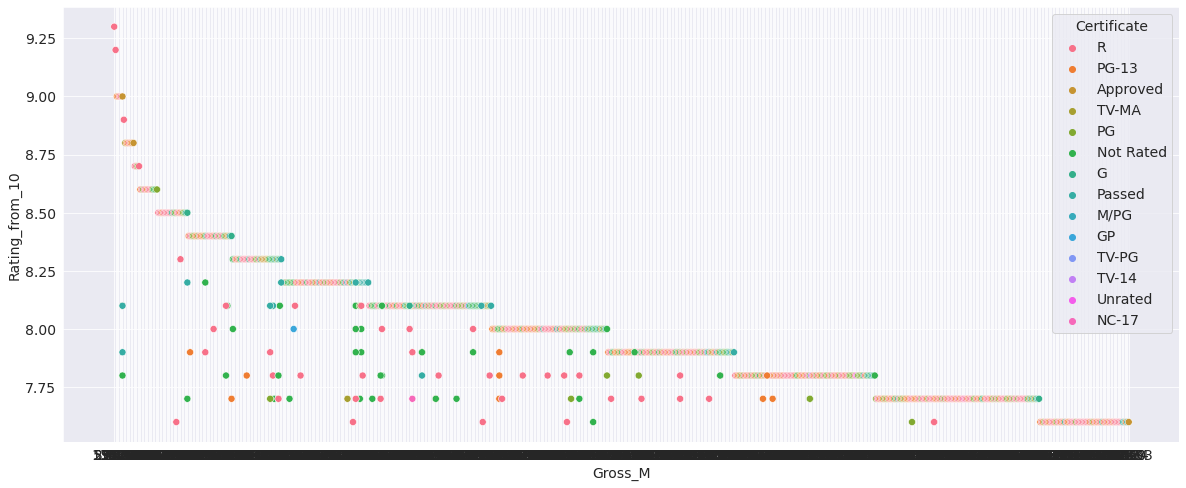

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(x=imdb_movies_df.Gross_M, y=imdb_movies_df.Rating_from_10, hue=imdb_movies_df.Certificate, s=50);

#### Q5: What is year wise Gross_M?

In [ ]:
imdb_movies_year_df = imdb_movies_df.groupby('Year')['Gross_M'].sum()
imdb_movies_year_df

Year
1921               5.45
1924               0.98
1925           5.450.05
1926               1.03
1927           1.240.54
               ...     
I 2019           335.45
I 2020             #130
II 2016     100.5526.86
III 2016           1.24
III 2018          26.02
Name: Gross_M, Length: 117, dtype: object

## Inferences and Conclusion

We observe that there are only two movies with IMDB greater than 9.

From analyzing the data,
1. there are only two movies with IMDB greater than 9,
2. the movies having IMDB greater than 9 have runtime less than 210,
3. R rated and PG-13 consists of more than half of this list,

It is surprising to see that 75% of the movies in the top rated list belong to one among three certificates and for 15% of movies there is no rating available.